In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

# set env
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)



data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
main_df = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(main_df))
main_df.head(6)

17261


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,7.5,298.0,Isothermal titration calorimetry,23222642,pnat,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,1,0.0,good,-8.79,3fyl,"A:74,B:76","C:16,D:16",A_1.B_1,C_1.D_1,0.1,0.25,Swiss-Prot,777,yes,"1m2z_A,6cfn_C","0.7293488372093023,0.23546511627906977",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_6,Cluster_43,9,"protein_6,protein_965,protein_966,protein_1059...",ssDNA0,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.83,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA1,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,7.8,298.0,Fluorescence,18729380,pnat,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,1,0.0,good,-7.99,1jmc,A:238,B:8,A_1,B_1,0.39,0.12,Swiss-Prot,616,yes,"1fgu_A,1l1o_C,2b29_A","0.4446617647058823,0.3088235294117647,0.214705...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_12,Cluster_30,22,"protein_12,protein_2647,protein_2658,protein_2...",ssDNA2,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226
3,3,pnat_14707,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCCGGAAGAGCACGC,wild,DNA,ssDNA,5e-10,-12.69,8.3,298.0,Gel shift,21227928,pnat,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,1,0.0,good,-12.69,3imb,A:238,"E:9,F:9",A_1,E_1.F_1,1.0,0.32,TrEMBL,238,yes,2q10_A,1.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_13,Cluster_41,7,"protein_13,protein_107,protein_108,protein_109...",ssDNA3,Cluster_1010,1,ssDNA3,protein_13_ssDNA3,"protein_13_ssDNA3,protein_107_ssDNA3,protein_1...",7,cluster_pair_2,pnat_14707_3imb_protein_13,Brevibacillus centrosporus,DNA_0227
4,4,pnat_14714,Q8RNV8,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,CGCACGACTTCCTGGAAGAGCACGC,wild,DNA,ssDNA,5e-10,-12.69,8.3,298.0,Gel shift,21227928,pnat,MKIWSKEEVVNKLHEIKNKGYLSVPTDMFRTDDGVVGQILERQFGV...,1,0.0,good,-12.69,3imb,A:238,"E:9,F:9",A_1,E_1.F_1,1.0,0.28,TrEMBL,238,yes,2q10_A,1.0,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,protein_13,Cluster_41,7,"protein_13,protein_107,protein_108,protein_109...",ssDNA4,Cluster_1011,1,ssDNA4,protein_13_ssDNA4,"protein_13_ssDNA4,protein_107_ssDNA4,protein_1...",7,clus

5138


,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,13209,pnat_12423,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,0.980,-0.99,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,2,1.96,bigger_1,-0.01,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACTCA,TGAGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACTCA,25.0,25.0,25.0,1.0,1.0,1.0,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1258,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2511_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_12423_NONE_protein_2511,Rattus norvegicus,"DNA_3230,DNA_3231"
1,13219,pnat_2082,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,Y271S,dsDNA,dsDNA,0.200,-0.98,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,3,1.41,bigger_1,-0.99,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATC,25.0,25.0,25.0,1.0,1.0,1.0,protein_2513,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1257,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2513_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_2082_NONE_protein_2513,Rattus norvegicus,"DNA_3228,DNA_3229"
2,14483,pronab_6471,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GGACGGCATTGGATCGACCA...,Y271A,DNA,dsDNA,0.314,-0.71,7.7,310.0,Chemical quench,9173867,pronab,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,1,0.00,good,-0.71,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GGACGGCATTGGATCGACCAGATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATCTGGTCGATCCAATGCCGTCC,25.0,25.0,45.0,1.0,0.5556,0.7778,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1470,"Cluster_2456,Cluster_620",1,dsDNA1470,protein_2511_dsDNA1470,"protein_1324_dsDNA1470,protein_2511_dsDNA1470,...",4,cluster_pair_3964,pronab_6471_NONE_protein_2511,Rattus norvegicus,"DNA_3228,DNA_3856"
3,13206,pnat_6847,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,0.650,-0.98,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,3,1.41,bigger_1,-0.27,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATC,25.0,25.0,25.0,1.0,1.0,1.0,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1257,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2511_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_6847_NONE_protein_2511,Rattus norvegicus,"DNA_3228,DNA_3229"
4,14484,pronab_6479,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQA

In [24]:
data_dir = '../data/pri_data/test/'
data_file = 'test.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t', low_memory=False)
print(len(df))
# df.head(6)

complex2freq = dict()
uniq_complex = set()
cid_list = []
for i in range(len(df)):
    s = df.loc[i]['protein_sequence'] + df.loc[i]['nucleotide_sequence']
    uniq_complex.add(s)
    if s not in complex2freq:
        complex2freq[s] = 1
        cid_list.append(df.loc[i]['complex_id'])
    else:
        complex2freq[s] += 1
print(len(uniq_complex))

rs = []
for cid in cid_list:
    r = df[df['complex_id'] == cid]
    rs.append(r)
new_df = pd.concat(rs)

data_dir = '../data/pri_data/test/'
data_file = 'test.csv'
data_file = os.path.join(data_dir, data_file)
new_df.to_csv(data_file, index=False, sep='\t')

pd.read_csv(data_file, sep='\t')

3873

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,pH,Tm,Method,pmid,data_source,protein_na_pair,multiple_dg,max_min,max_min_judge,dG_ori,pdb_id,len_p1,len_p2,protein_chain,na_chain,identity_protein_seq,identity_na_seq,UniProt_type,protein_sequence_len,wt_af2_file_download,mo_pdb_chain,bs_score,nucleotide_sequence_one,nucleotide_sequence_two,nucleotide_sequence_two_reverse,align_score,len_nucleotide_sequence_one,len_nucleotide_sequence_two,coverage_nucleotide_sequence_one,coverage_nucleotide_sequence_two,coverage_mean_nucleotide_sequence,protein_index,cluster_protein_50_index,cluster_protein_50_number,cluster_protein_50_member,na_index,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,13209,pnat_12423,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACTCA|TGAGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,9.800000e-01,-0.990,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,2,1.96,bigger_1,-0.01,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACTCA,TGAGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACTCA,25.0,25.0,25.0,1.0,1.0,1.0,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1258,"Cluster_622,Cluster_623",1,dsDNA1258,protein_2511_dsDNA1258,"protein_1324_dsDNA1258,protein_2511_dsDNA1258,...",8,cluster_pair_3746,pnat_12423_NONE_protein_2511,Rattus norvegicus,"DNA_3230,DNA_3231"
1,13219,pnat_2082,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,Y271S,dsDNA,dsDNA,2.000000e-01,-0.980,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,3,1.41,bigger_1,-0.99,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATC,25.0,25.0,25.0,1.0,1.0,1.0,protein_2513,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1257,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2513_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_2082_NONE_protein_2513,Rattus norvegicus,"DNA_3228,DNA_3229"
2,14483,pronab_6471,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GGACGGCATTGGATCGACCA...,Y271A,DNA,dsDNA,3.140000e-01,-0.710,7.7,310.0,Chemical quench,9173867,pronab,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,1,0.00,good,-0.71,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GGACGGCATTGGATCGACCAGATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATCTGGTCGATCCAATGCCGTCC,25.0,25.0,45.0,1.0,0.5556,0.7778,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1470,"Cluster_2456,Cluster_620",1,dsDNA1470,protein_2511_dsDNA1470,"protein_1324_dsDNA1470,protein_2511_dsDNA1470,...",4,cluster_pair_3964,pronab_6471_NONE_protein_2511,Rattus norvegicus,"DNA_3228,DNA_3856"
3,13206,pnat_6847,P06766,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,GCCTCGCAGCCGTCCAACCAACATC|GATGTTGGTTGGACGGCTGC...,Y271A,dsDNA,dsDNA,6.500000e-01,-0.980,7.7,310.0,Chemical quench,9173867,pnat,MSKRKAPQETLNGGITDMLVELANFEKNVSQAIHKYNAYRKAASVI...,3,1.41,bigger_1,-0.27,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Swiss-Prot,335,yes,3v7j_A,0.9761194029850746,GCCTCGCAGCCGTCCAACCAACATC,GATGTTGGTTGGACGGCTGCGAGGC,GCCTCGCAGCCGTCCAACCAACATC,25.0,25.0,25.0,1.0,1.0,1.0,protein_2511,Cluster_38,13,"protein_677,protein_1069,protein_1323,protein_...",dsDNA1257,"Cluster_620,Cluster_621",1,dsDNA1257,protein_2511_dsDNA1257,"protein_1324_dsDNA1257,protein_2511_dsDNA1257,...",6,cluster_pair_3745,pnat_6847_NONE_protein_2511,Rattus norvegicus,"DNA_3228,DNA_3229"
4,14484,pronab_6479,P06766,

In [7]:
complex2freq = dict()
uniq_complex = set()
for i in range(len(main_df)):
    s = main_df.loc[i]['protein_sequence'] + main_df.loc[i]['nucleotide_sequence']
    uniq_complex.add(s)
    if s not in complex2freq:
        complex2freq[s] = 1
    else:
        complex2freq[s] += 1
len(uniq_complex)

9093

<Figure size 432x288 with 0 Axes>

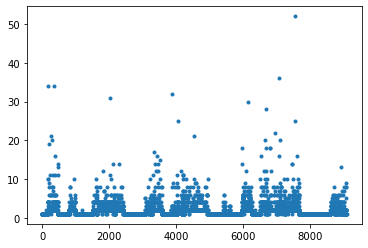

In [14]:
a = np.array([x for _, x in complex2freq.items()])

from matplotlib import pyplot as plt
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
ax.plot(a, '.')

In [20]:
len(a[a>2])

1092

In [155]:


def compute_info(name, df, output):
    
    seqs = [x for x in df["protein_sequence"]]
    
    pr_lengths = np.array([len(x) for x in df["protein_sequence"]])
    nc_lengths  = np.array([len(x) for x in df["nucleotide_sequence"]])
    pr_max_len = pr_lengths.max()
    pr_len_rate = (pr_max_len - pr_lengths.min()) / pr_max_len
    nc_len_rate = (nc_lengths.max() - nc_lengths.min()) / nc_lengths.max() 
    
    dgs = df["dG"].to_numpy()
    dg_var = dgs.var()
    
    info = {
        "complex_ids": df["complex_id"].to_numpy(),
        "seqs": seqs,
        "dg_var": dg_var,
        "dg": dgs,
        
        "pr_lens": pr_lengths,
        "nc_lens": nc_lengths,
        "pr_max_len": pr_max_len,
        "pr_len_rate": pr_len_rate,
        "nc_len_rate": nc_len_rate,
        
        "size": len(df),
        
    }
    output[name] = info

cluster2df = dict()

for clus_name, clus_df in main_df.groupby("cluster_protein_na_pair_index"):
    cluster2df[clus_name] = clus_df

cluster2info = dict()
for clus_name, clus_df in cluster2df.items():
    compute_info(clus_name, clus_df, cluster2info)



In [152]:
def do_group(target_ids, mapping, output):
    print("do")
    dgs = np.array([dg for dg, cid in zip(mapping["dg"], mapping["complex_ids"]) if cid in target_ids])
    cids = np.array([cid for cid in mapping["complex_ids"] if cid in target_ids])
    assert(len(dgs) == len(cids))
    if len(dgs) == 0:
        return
    
    id_max = np.argmax(dgs)
    id_min = np.argmin(dgs)
    ids_group1 = np.where(dgs[id_max] - dgs < 1.0)[0]
    ids_group2 = np.where(dgs - dgs[id_min] < 1.0)[0]
    print(cids)
    cids_group1 = cids[ids_group1]
    cids_group2 = cids[ids_group2]
    output.append({'cids': cids_group1, 'dgs': dgs[ids_group1]})
    output.append({'cids': cids_group2, 'dgs': dgs[ids_group2]})
    
    # compute other_ids with cids_group1 and cids_group2
    mark = np.logical_and(dgs[id_max] - dgs >= 1.0, dgs - dgs[id_min] >= 1.0)
    other_ids = np.where(mark)
    other_cids = cids[other_ids]
    
    if len(other_ids) > 0:
        do_group(other_cids, mapping, output)
    

cids = cluster2info['cluster_pair_1787']['complex_ids']
print(len(cids))
mapping = cluster2info['cluster_pair_1787']
groups = []
do_group(cids, mapping, groups)
print(groups, sum([len(x) for x in groups]))

26
do
[6111 6112 6113 6114 6115 6116 6117 6485 6486 6487 6488 6489 6490 6491
 6492 6493 6494 6799 6800 6801 6802 6803 6804 6805 6806 6807]
do
[{'cids': array([6111, 6112, 6113, 6114, 6115, 6116, 6117, 6801, 6802, 6803, 6804,
       6805, 6806, 6807]), 'dgs': array([-4.565, -4.565, -4.64 , -4.64 , -4.725, -4.64 , -4.64 , -4.565,
       -4.565, -4.64 , -4.64 , -4.725, -4.64 , -4.64 ])}, {'cids': array([6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6799,
       6800]), 'dgs': array([-8.94, -8.94, -8.89, -9.  , -8.7 , -8.89, -8.79, -8.66, -8.89,
       -8.89, -9.  , -9.  ])}] 4


In [234]:
keys = []
n_sum = 0
all_lens = []
all_vars = []
for k, v in cluster2info.items():
    finds = np.where(v['pr_lens'] > 1000)[0]
    if len(finds) == 0:
        continue
    keys.append(k)
    all_lens.append(v['pr_lens'])
    all_vars.append(v['dg_var'])
    n_sum += len(v['pr_lens'])
print(len(cluster2info.keys()), len(keys), n_sum,  keys)

4457 256 983 ['cluster_pair_102', 'cluster_pair_1023', 'cluster_pair_1024', 'cluster_pair_106', 'cluster_pair_1092', 'cluster_pair_1111', 'cluster_pair_112', 'cluster_pair_124', 'cluster_pair_1319', 'cluster_pair_1320', 'cluster_pair_1321', 'cluster_pair_1322', 'cluster_pair_1323', 'cluster_pair_1326', 'cluster_pair_1327', 'cluster_pair_1328', 'cluster_pair_1329', 'cluster_pair_133', 'cluster_pair_1330', 'cluster_pair_1337', 'cluster_pair_1338', 'cluster_pair_1339', 'cluster_pair_1340', 'cluster_pair_1341', 'cluster_pair_15', 'cluster_pair_1505', 'cluster_pair_1506', 'cluster_pair_1511', 'cluster_pair_1520', 'cluster_pair_1524', 'cluster_pair_153', 'cluster_pair_1601', 'cluster_pair_1603', 'cluster_pair_1605', 'cluster_pair_1611', 'cluster_pair_1618', 'cluster_pair_1684', 'cluster_pair_1685', 'cluster_pair_1700', 'cluster_pair_1708', 'cluster_pair_1709', 'cluster_pair_1711', 'cluster_pair_1725', 'cluster_pair_1752', 'cluster_pair_1753', 'cluster_pair_1754', 'cluster_pair_1755', 'cluste

In [106]:
clu_with_max_size = ''
max_size = 0
for k, v in cluster2info.items():
    if v['size'] > max_size:
        max_size = v['size']
        clu_with_max_size = k
cluster2info[clu_with_max_size]

{'complex_ids': array([10710, 10711, 10712, 10713, 10714, 10715, 10716, 10717, 10718,
        10719, 10720, 10721, 10722, 10723, 10724, 10725, 10726, 10727,
        10728, 10729, 10730, 10731, 10732, 10733, 10734, 10735, 10736,
        10737, 10738, 10739, 10740, 10741, 10742, 10743, 10744, 10745,
        10746, 10747, 10748, 10749, 10750, 10751, 11680, 11681, 11682,
        11683, 11684, 11685, 11686, 11687, 11688, 11689, 11690, 11691,
        11692, 11693, 11694, 11695, 11696, 11697, 11698, 11699, 11700,
        11701, 11702, 11703, 11704, 11705, 11706, 11707, 11708, 11709,
        11710, 11711, 11712, 11713, 11714, 11715, 11716, 11717, 11718,
        11719, 11720, 11721, 11722, 11723, 11724, 11725, 11726, 11727,
        11728, 11729, 11730, 11731, 11732, 11733, 11734, 11735, 11736,
        11737, 11738, 11739, 11740, 11741, 11742, 11743, 11744, 11745,
        11746, 11747, 11748, 11749, 11750, 11751, 11752, 11753, 11754,
        11755, 11756, 11757, 11758, 11759, 11760, 11761, 11762

In [102]:
clu = ''
max_len_rate = 0
for k, v in cluster2info.items():
    if v['pr_len_rate'] > max_len_rate:
        max_len_rate = v['pr_len_rate']
        clu = k
print(cluster2info[clu])

clu = ''
max_len_rate = 0
for k, v in cluster2info.items():
    if v['nc_len_rate'] > max_len_rate:
        max_len_rate = v['nc_len_rate']
        clu = k
print(cluster2info[clu])

{'complex_ids': array([4024, 4330, 4331, 4332, 4333, 4334]), 'dg_var': 3.0012916666666674, 'dg': array([-13.3 ,  -8.09, -12.05, -11.58, -13.21, -11.52]), 'pr_lens': array([616, 380, 441, 616, 448, 328]), 'nc_lens': array([49, 49, 49, 49, 49, 49]), 'pr_max_len': 616, 'pr_len_rate': 0.4675324675324675, 'nc_len_rate': 0.0, 'size': 6}
{'complex_ids': array([11157, 11180, 11181]), 'dg_var': 0.002866666666666698, 'dg': array([-11.  , -11.13, -11.05]), 'pr_lens': array([609, 609, 609]), 'nc_lens': array([199, 133,  67]), 'pr_max_len': 609, 'pr_len_rate': 0.0, 'nc_len_rate': 0.6633165829145728, 'size': 3}


In [40]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] > 0.1 and v['pr_len_rate'] > 0.1:
        clus.append(k)
for x in clus:
    print(cluster2info[x])

{'dg_var': 0.566276446280992, 'dg': array([-10.68 , -10.68 , -11.75 , -12.355, -10.94 , -10.68 , -10.68 ,
       -11.75 , -12.69 , -12.355, -10.94 ]), 'pr_lens': array([102, 102, 102, 102,  80, 102, 102, 102, 102, 102,  80]), 'nc_lens': array([27, 27, 27, 27, 18, 27, 27, 27, 16, 27, 18]), 'pr_max_len': 102, 'pr_len_rate': 0.21568627450980393, 'nc_len_rate': 0.4074074074074074, 'size': 11}
{'dg_var': 0.5153372222222223, 'dg': array([-12.238, -12.238, -12.238, -12.215, -12.215, -12.215, -11.51 ,
       -10.98 , -10.98 , -10.98 , -10.98 , -10.98 , -10.98 , -10.98 ,
       -10.98 , -10.98 , -10.98 , -12.28 , -12.28 , -12.28 , -12.238,
       -12.238, -12.215, -12.215, -12.215, -11.51 , -14.08 , -11.28 ,
       -11.28 , -11.28 ]), 'pr_lens': array([282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,
       282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,
       282, 225, 225, 225]), 'nc_lens': array([28, 28, 28, 28, 28, 28, 28, 46, 46, 46, 46, 46, 46, 46, 46, 46

In [42]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] > 0.1 or v['pr_len_rate'] > 0.1 and v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

79
{'dg_var': 0.006400000000000012, 'dg': array([-7.83, -7.99]), 'pr_lens': array([616, 616]), 'nc_lens': array([42, 60]), 'pr_max_len': 616, 'pr_len_rate': 0.0, 'nc_len_rate': 0.3, 'size': 2}

{'dg_var': 0.05014285714285709, 'dg': array([ -9.49,  -9.76,  -9.76, -10.09, -10.09, -10.09, -10.09,  -9.49,
        -9.76,  -9.76, -10.09, -10.09, -10.09, -10.09]), 'pr_lens': array([104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104]), 'nc_lens': array([35, 40, 45, 50, 55, 60, 65, 35, 40, 45, 50, 55, 60, 65]), 'pr_max_len': 104, 'pr_len_rate': 0.0, 'nc_len_rate': 0.46153846153846156, 'size': 14}

{'dg_var': 0.003599999999999953, 'dg': array([-11.  , -11.12]), 'pr_lens': array([609, 609]), 'nc_lens': array([99, 66]), 'pr_max_len': 609, 'pr_len_rate': 0.0, 'nc_len_rate': 0.3333333333333333, 'size': 2}

{'dg_var': 0.0001000000000000135, 'dg': array([-11.05, -11.03]), 'pr_lens': array([609, 609]), 'nc_lens': array([50, 75]), 'pr_max_len': 609, 'pr_len_rate': 0.0, 'nc_len_r

In [44]:
clus = []
for k, v in cluster2info.items():
    if v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

615
{'dg_var': 0.31640625, 'dg': array([-11.33 , -12.455, -11.33 , -12.455]), 'pr_lens': array([1756, 1756, 1756, 1756]), 'nc_lens': array([17, 17, 17, 17]), 'pr_max_len': 1756, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 4}

{'dg_var': 0.10248437500000018, 'dg': array([-10.5725, -11.22  , -11.22  , -11.22  , -11.19  , -10.5725,
       -10.5725, -10.5725]), 'pr_lens': array([246, 246, 246, 246, 246, 246, 246, 246]), 'nc_lens': array([28, 28, 28, 28, 28, 28, 28, 28]), 'pr_max_len': 246, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 8}

{'dg_var': 0.2012789940828403, 'dg': array([-7.34 , -6.9  , -7.245, -7.54 , -6.875, -7.2  , -7.245, -7.115,
       -8.58 , -7.085, -7.73 , -7.85 , -7.715, -7.34 , -6.9  , -7.245,
       -7.54 , -6.875, -7.2  , -7.245, -7.115, -8.58 , -7.085, -7.73 ,
       -7.85 , -7.715]), 'pr_lens': array([222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222]), 'nc_lens': array([10,

In [237]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] < 0.1 and v['pr_len_rate'] < 0.1 and v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))

for x in clus:
    print(cluster2info[x])
    print()

565
{'complex_ids': array([3047, 3061, 5204, 5205]), 'seqs': ['MMSIAQVRSAGSAGNYYTDKDNYYVLGSMGERWAGRGAEQLGLQGSVDKDVFTRLLEGRLPDGADLSRMQDGSNRHRPGYDLTFSAPKSVSMMAMLGGDKRLIDAHNQAVDFAVRQVEALASTRVMTDGQSETVLTGNLVMALFNHDTSADQEPQLHTHAVVANVTQHNGEWKTLSSDKVGKTGFIENVYANQIAFGRLYREKLKEQVEALGYETEVVGKHGMWEMPGVPVEAFSGRSQTIREAVGEDASLKSRDVAALDTRKSKQHVDPEIKMAEWMQTLKETGFDIRAYRDAADQRADLRTLTPGPASQDGPDVQQAVTQAIAGLSERKVQFTYTDVLARTVGILPPENGVIERARAGIDEAISREQLIPLDREKGLFTSGIHVLDELSVRALSRDIMKQNRVTVHPEKSVPRTAGYSDAVSVLAQDRPSLAIVSGQGGAAGQRERVAELVMMAREQGREVQIIAADRRSQMNMKQDERLSGELITGRRQLLEGMAFTPGSTVIVDQGEKLSLKETLTLLDGAARHNVQVLITDSGQRTGTGSALMAMKDAGVNTYRWQGGEQRPATIISEPDRNVRYARLAGDFAASVKAGEESVAQVSGVREQAILTQAIRSELKTQGVLGLPEVTMTALSPVWLDSRSRYLRDMYRPGMVMEQWNPETRSHDRYVIDRVTAQSHSLTLRDAQGETQVVRISSLDSSWSLFRPEKMPVADGERLRVTGKIPGLRVSGGDRLQVASVSEDAMTVVVPGRAEPATLPVSDSPFTALKLENGWVETPGHSVSDSATVFASVTQMAMDNATLNGLARSGRDVRLYSSLDETRTAEKLARHPSFTVVSEQIKTRAGETSLETAISHQKSALHTPAQQAIHLALPVVESKKLAFSMVDLLTEAKSFAAEGTGFTELGGEINAQIKRGDLLYVDVAKGYGTGLLVSRASY

In [184]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] < 0.1 and v['pr_len_rate'] < 0.1 and v['dg_var'] > 2.0:
        clus.append(k)
print(len(clus))

cluster_info_with_max_len = None
max_len = 0
for x in clus:
    print(cluster2info[x])
    print()
    dgs = cluster2info[x]['dg']
    if len(dgs) > max_len:
        max_len = len(dgs)
        cluster_info_with_max_len = cluster2info[x]

68
{'complex_ids': array([3736, 5794, 5795, 5796, 5797]), 'seqs': ['MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLMSDGLNTLSSFMLATQLNPLVEEEQLSSNCVCQIHRFIVNTLKDGRRVVILMELEVLKSAEAVGVKIGNPVPYNEGLGQPQVAPPAPAASPAASSRPQPQNGSSGMGSTVSKAYGASKTFGKAAGPSLSHTSGGTQSKVVPIASLTPYQSKWTICARVTNKSQIRTWSNSRGEGKLFSLELVDESGEIRATAFNEQVDKFFPLIEVNKVYYFSKGTLKIANKQFTAVKNDYEMTFNNETSVMPCEDDHHLPTVQFDFTGIDDLENKSKDSLVDIIGICKSYEDATKITVRSNNREVAKRNIYLMDTSGKVVTATLWGEDADKFDGSRQPVLAIKGARVSDFGGRSLSVLSSSTIIANPDIPEAYKLRGWFDAEGQALDGVSISDLKSGGVGGSNTNWKTLYEVKSENLGQGDKPDYFSSVATVVYLRKENCMYQACPTQDCNKKVIDQQNGLYRCEKCDTEFPNFKYRMILSVNIADFQENQWVTCFQESAEAILGQNAAYLGELKDKNEQAFEEVFQNANFRSFIFRVRVKVETYNDESRIKATVMDVKPVDYREYGRRLVMSIRRSALM', 'MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLMSDGLNTLSSFMLATQLNPLVEEEQLSSNCVCQIHRFIVNTLKDGRRVVILMELEVLKSAEAVGVKIGNPVPYNEGLGQPQVAPPAPAASPAASSRPQPQNGSSGMGSTVSKAYGASKTFGKAAGPSLSHTSGGTQSKVVPIASLTPYQSKWTICARVTNKSQIRTWSNSRGEGKLFSLELVDESGEIRATAFNEQVDKFFPLIEVNKVYYFSKGTLKIANKQFTAVKNDYEMTFNNETSVMPCEDDHHLPTVQFDFTGIDDLENKS

In [60]:
sum_size = 0
for x in clus:
    sum_size += cluster2info[x]['size']
sum_size

5969

In [175]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


def seqs_similar(alist):
    lens = len(alist)
    out = np.zeros([lens,lens],dtype=np.float)
    for i in range(lens):
        for j in np.arange(i, lens):
            out[i,j] = out[j,i] = similar(alist[i], alist[j])
    return out

seq_sim_by_clus = dict()
for k in tqdm(clus):
    seq_sim_by_clus[k] = seqs_similar(cluster2info[k]['seqs'])

  0%|          | 0/565 [00:00<?, ?it/s]<ipython-input-175-b6394ac1d864>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = np.zeros([lens,lens],dtype=np.float)
100%|██████████| 565/565 [00:09<00:00, 58.14it/s] 


In [182]:
import sys
np.set_printoptions(precision=3)
np.set_printoptions(threshold=sys.maxsize)

min_sim = 1.
k_min_sim = ''
v_min_sim = None
for k, v in seq_sim_by_clus.items():
    if v.min() < min_sim:
        min_sim = v.min()
        k_min_sim = k
        v_min_sim = v
k_min_sim, min_sim, v_min_sim

('cluster_pair_113',
 0.006455083378160301,
 array([[1.   , 0.998, 0.997, 0.992, 0.989, 0.988, 0.986, 0.986, 0.985,
         0.985, 0.998, 0.998, 0.998, 1.   , 0.998, 0.997, 0.992, 0.989,
         0.988, 0.986, 0.986, 0.985, 0.985, 0.998, 0.998, 0.998, 0.998,
         0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.006, 0.006, 0.006,
         0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
         0.006, 0.006, 0.006, 0.006, 0.006],
        [0.998, 1.   , 0.998, 0.993, 0.99 , 0.989, 0.987, 0.987, 0.986,
         0.986, 0.998, 0.998, 0.998, 0.998, 1.   , 0.998, 0.993, 0.99 ,
         0.989, 0.987, 0.987, 0.986, 0.986, 0.998, 0.998, 0.998, 0.998,
         0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.006, 0.006, 0.006,
         0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
         0.006, 0.006, 0.006, 0.006, 0.006],
        [0.997, 0.998, 1.   , 0.995, 0.991, 0.99 , 0.988, 0.988, 0.987,
         0.987, 0.998, 0.998, 0.998, 0.997, 0.998, 1.   , 0.995, 0.991,
  

In [236]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, MeanShift, DBSCAN, OPTICS


seqs = np.array(cluster_info_with_max_len['seqs'])
ids = cluster_info_with_max_len['complex_ids']
X = cluster_info_with_max_len['dg']
X = X.reshape(-1,1)

diff = np.abs(X.max() - X.min())
n_clusters = int(np.ceil(diff / 2.0))
print(n_clusters)

n_clusters=max(n_clusters, 2)

model = KMeans(n_clusters=n_clusters)
# model = MeanShift()

# 模型拟合
model.fit(X)
yhat = model.predict(X)

clusters = unique(yhat)

Xgroups = []
IDSgroups = []
seqs_groups = []
ctr_pt = []
for cluster in clusters:
    row_ix = where(yhat == cluster)
    Xgroups.append(X[row_ix])
    ctr_pt.append(X[row_ix].mean())
    IDSgroups.append(ids[row_ix])
    seqs_groups.append(seqs[row_ix])
print(ctr_pt)
print(Xgroups)
print(IDSgroups)

4
[-13.00047619047619, -8.909999999999998, -11.326000000000002, -7.12]
[array([[-14.1],
       [-13. ],
       [-13.5],
       [-12.6],
       [-14. ],
       [-12.8],
       [-13.9],
       [-13.9],
       [-13.2],
       [-13.2],
       [-13.2],
       [-13.2],
       [-13.2],
       [-12.4],
       [-12.4],
       [-12.4],
       [-12.4],
       [-12.4],
       [-12.4],
       [-12.4],
       [-12.4]]), array([[-8.2],
       [-9.2],
       [-8.9],
       [-8.6],
       [-9. ],
       [-9. ],
       [-9. ],
       [-9. ],
       [-9. ],
       [-9. ],
       [-9. ],
       [-9. ]]), array([[-11.9],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3],
       [-11.3]]), array([[-7.4],
       [-6.3],
       [-7.4],
       [-7.6],
       [-6.8]])]
[array([17124, 17125, 17126, 17133, 17134, 17135, 17164, 17165, 17174,
       17175, 17176, 17177, 17178, 17188, 17189, 17190, 17191, 17192,
       17193, 17194, 17195])

/home/megvii/anaconda3/envs/paul-py3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [239]:
cluster2info[x].keys()

dict_keys(['complex_ids', 'seqs', 'dg_var', 'dg', 'pr_lens', 'nc_lens', 'pr_max_len', 'pr_len_rate', 'nc_len_rate', 'size'])

In [241]:
dgs

array([-10.3, -10. , -10.1, -10.2, -11.7, -10.1, -11.6, -11.6, -11.5,
       -11.5, -10.2, -10.3, -11.6, -10.4, -11.6, -10.8, -10.8, -10.3,
       -10. , -10.1, -10.1, -10.1, -10.2, -11.7, -10.1, -11.6, -10.4,
       -10.4, -11.6, -11.3, -11.3, -11.5, -11.5, -10.2, -10.3, -11.6,
       -10.4, -11.6, -10. , -10. ])

In [248]:
A_dgs = []
B_dgs = []
np.random.seed(42)

for x in clus:
    dgs = cluster2info[x]['dg']
    rt = np.random.random(size=1)
    if rt >= 0.5:
        A_dgs.append(dgs)
    else:
        B_dgs.append(dgs)
A_dgs = np.concatenate(A_dgs)
B_dgs = np.concatenate(B_dgs)

In [259]:

x = A_dgs
y = np.zeros(x.shape[0])
y[:B_dgs.shape[0]] = B_dgs
x.shape, y.shape

((3489,), (3489,))

In [265]:
import numpy as np
import scipy.stats

x = A_dgs / np.sum(A_dgs)
y = B_dgs / np.sum(B_dgs)

KL = scipy.stats.entropy(x[:10],y[:10])
print(KL)

0.04655142620116621


In [266]:
x[:10],y[:10]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [3]:
def process(key, sub_df, target, output_groups, property_by_key):
    
    indices = sub_df["nucleic_acid_type_new"].str.contains(target)
    df = sub_df[indices]
    if len(df) == 0:
        return
    output_groups[(key, target)] = df
    
    dGs = df["dG"].to_numpy()
    
    prots = df["protein_sequence"]
    prots_length = np.array([len(it) for it in prots])
    nucs = df["nucleotide_sequence"]
    nucs_length = np.array([len(it) for it in nucs])
    
    prop = {
        "dG_var" : dGs.var(),
        "size" : len(df),
        "prot_len_var" : prots_length.var(),
        "nuc_len_var" : nucs_length.var(),
    }
    property_by_key[(key, target)] = prop

groups = {}
for key, sub_df in df.groupby("cluster_protein_na_pair_index"):
    groups[key] = sub_df
print(len(groups.keys()))
# for k, v in groups.items():
#     print(k)

new_groups = {}
property_by_key = {}
for key, sub_df in groups.items():
    process(key, sub_df, "DNA", new_groups, property_by_key)
    process(key, sub_df, "RNA", new_groups, property_by_key)

print(len(new_groups.keys()))

4457
4457


In [4]:
new_groups_by_dna = {}
new_groups_by_rna = {}
for k, v in new_groups.items():
    if "DNA" in k:
        new_groups_by_dna[k[0]] = v
    else:
        new_groups_by_rna[k[0]] = v

In [5]:
dg_vars_by_key = {}
for k, v in property_by_key.items():
    dg_vars_by_key[k] = v['dG_var']
dg_vars_by_key

{('cluster_pair_0', 'DNA'): 0.0,
 ('cluster_pair_1', 'DNA'): 0.006400000000000012,
 ('cluster_pair_10', 'DNA'): 0.0,
 ('cluster_pair_100', 'DNA'): 0.0,
 ('cluster_pair_1000', 'DNA'): 0.0,
 ('cluster_pair_1001', 'DNA'): 0.0,
 ('cluster_pair_1002', 'DNA'): 0.0,
 ('cluster_pair_1003', 'DNA'): 0.0,
 ('cluster_pair_1004', 'DNA'): 0.0,
 ('cluster_pair_1005', 'DNA'): 0.0,
 ('cluster_pair_1006', 'DNA'): 0.0,
 ('cluster_pair_1007', 'DNA'): 0.0,
 ('cluster_pair_1008', 'DNA'): 0.0,
 ('cluster_pair_1009', 'DNA'): 0.0,
 ('cluster_pair_101', 'DNA'): 0.0,
 ('cluster_pair_1010', 'DNA'): 0.0,
 ('cluster_pair_1011', 'DNA'): 0.0,
 ('cluster_pair_1012', 'DNA'): 0.0,
 ('cluster_pair_1013', 'DNA'): 0.0,
 ('cluster_pair_1014', 'DNA'): 0.0,
 ('cluster_pair_1015', 'DNA'): 0.0,
 ('cluster_pair_1016', 'DNA'): 0.0,
 ('cluster_pair_1017', 'DNA'): 0.0,
 ('cluster_pair_1018', 'DNA'): 0.0,
 ('cluster_pair_1019', 'DNA'): 0.0,
 ('cluster_pair_102', 'DNA'): 0.0,
 ('cluster_pair_1020', 'DNA'): 0.0,
 ('cluster_pair_1021',

In [86]:
v_vars = []
v_sizes = []
v_prot_len_var = []
for k, v in property_by_key.items():
    v_vars.append(v['dG_var'])
    v_sizes.append(v['size'])
    v_prot_len_var.append(v['prot_len_var'])
v_vars = np.array(v_vars)
v_sizes = np.array(v_sizes)
v_prot_len_var = np.array(v_prot_len_var)

In [98]:
len(v_vars), len(v_vars[v_vars > 0.1]), v_vars[v_vars > 0.1]

(4457,
 615,
 array([ 0.31640625,  0.10248438,  0.20127899,  0.41730898,  0.23622702,
         0.13868889,  0.11768125,  0.42108064,  0.65973521,  0.11428099,
         0.16137222,  0.25051267,  0.12307802,  0.49667222,  0.46450556,
         0.16499691,  1.22831   ,  0.123536  ,  0.32866066,  0.191675  ,
         0.93204161,  0.3078375 ,  3.37800067,  0.23367934,  0.27556875,
         0.57975556,  0.525625  ,  0.5476    ,  0.16841   ,  2.51255   ,
         3.00129167,  0.467021  ,  0.982816  ,  0.40698367,  0.258675  ,
         0.66609822,  0.50266224,  0.59130579,  0.1156    ,  0.46194711,
         0.225625  ,  0.11046667,  0.25028889,  0.35868889,  1.33368889,
         0.446536  ,  0.21206667,  0.32842222,  0.23025306,  0.140625  ,
         0.207025  ,  1.357225  ,  1.49168678,  0.22524722,  0.5329    ,
         0.5751    ,  0.1296    ,  0.39902222,  0.16      ,  0.2209    ,
         0.11526667,  0.1877125 ,  1.99594011,  1.90757344,  0.18438056,
         6.85748889,  2.435424  ,  0.7

In [99]:
target_sizes = v_sizes[v_vars > 0.1]
print(np.sum(target_sizes))
neg_target_sizes = v_sizes[v_vars <= 0.1]
print(np.sum(neg_target_sizes))

6822
10439


In [121]:
ids = np.where(v_vars > 0.1)
arr_keys = np.array(list(new_groups.keys()))
target_keys = arr_keys[ids]
max_id = np.argmax(target_sizes)
target_keys[max_id]

array(['cluster_pair_2937', 'DNA'], dtype='<U17')

In [126]:
new_groups[('cluster_pair_2937', 'DNA')]['dG'].to_numpy()

array([-10.585     , -10.545     , -10.785     , -10.75      ,
       -10.85      , -10.605     , -10.875     , -10.785     ,
       -10.905     ,  -9.71833333,  -9.71833333,  -9.375     ,
        -9.44333333,  -9.44333333, -10.11      ,  -9.49833333,
        -9.49833333,  -9.45666667,  -9.45666667,  -9.75666667,
        -9.75666667,  -9.85666667,  -9.85666667,  -9.80166667,
        -9.80166667,  -9.754     ,  -9.754     , -11.082     ,
       -10.528     , -11.004     , -10.86      , -10.77      ,
       -10.96      , -10.922     , -10.9       , -11.144     ,
       -11.026     , -11.042     ,  -9.036     ,  -9.036     ,
       -11.095     , -11.035     ,  -9.45      , -10.585     ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66

In [120]:
max_id = np.argmax(target_sizes)
target_vars = v_vars[v_vars > 0.1]
target_vars[max_id], target_sizes[max_id]

(0.6406935123809522, 175)

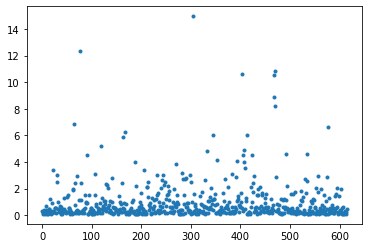

In [101]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(v_vars[v_vars > 0.1], '.')
plt.show()